<a href="https://colab.research.google.com/github/ldsAS/Tibame-AI-Learning/blob/main/Tibame20250623_AutoML_%E9%A0%90%E6%B8%AC%E8%B3%87%E6%96%99(HousePrice)_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Clement Chen</br>
E-Mail: clement1972@gmail.com</br>
https://sites.google.com/site/clement1972/</br>

# 參數設定

### <font color='red'>請修改下面的參數</font>

In [2]:
# eval_metric 評估指標
# options for classification:
#  ['accuracy', 'balanced_accuracy', 'f1', 'f1_macro', 'f1_micro', 'f1_weighted',
#  'roc_auc', 'roc_auc_ovo_macro', 'average_precision', 'precision', 'precision_macro',
#  'precision_micro', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro',
# 'recall_weighted', 'log_loss', 'pac_score']
#
# Options for regression:
#  ['root_mean_squared_error', 'mean_squared_error', 'mean_absolute_error',
#  'median_absolute_error', 'mean_absolute_percentage_error','r2']
eval_metric = None
# eval_metric = 'r2'

# data_filename 預測資料來源的檔名
data_filename = '/dataset/HousePrice_test.csv'

# prediction_filename 模型預測結果的檔名
prediction_filename = '/output/HousePrice_test_prediction.csv'

# model_path 模型儲存資料夾
model_path = '/output/model_HousePrice'


### 環境設定

In [1]:
environment_type = 1
#檢查執行環境是不是Colab
environment_base_folder = ''
if environment_type == 1:
    from google.colab import drive
    drive.mount('/content/drive') # 此處需要登入google帳號
    environment_base_folder = '/content/drive/MyDrive'
    ! pip install autogluon

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ct

### 載入資料

In [3]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv(environment_base_folder+data_filename)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
2,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
3,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
4,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,480,30,RM,50.0,5925,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,89471
288,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,260000
289,803,60,RL,63.0,8199,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,189000
290,652,70,RL,60.0,9084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,108000


### 載入模型

In [6]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [7]:
import pickle
with open(environment_base_folder+model_path+'/used_field.bin', 'rb') as handle:
  used_field = pickle.load(handle)

input_field = used_field['input_field']
target_field = used_field['target_field']
working_field = input_field.copy()
working_field.append(target_field)

model = TabularPredictor.load(environment_base_folder+model_path)

# 輸出預測結果

In [8]:
prediction_p = None
if (model.problem_type != 'regression'):
  prediction_p = model.predict_proba(data)
prediction = model.predict(data)

In [9]:
pred_data = data.copy()
pred_data['預測結果'] = prediction
pred_data = pd.concat([pred_data,prediction_p], axis=1, join='inner')
pred_data.to_csv(environment_base_folder+prediction_filename)

# 評估分數

In [10]:
model.evaluate(data)

{'r2': 0.8985553979873657,
 'root_mean_squared_error': np.float64(-27894.678113138012),
 'mean_squared_error': -778113024.0,
 'mean_absolute_error': -15019.11328125,
 'pearsonr': 0.9513704259487382,
 'median_absolute_error': np.float64(-8139.46875)}

# 欄位重要性

In [11]:
output = ''
if target_field in data:
    output = model.feature_importance(data)
output

These features in provided data are not utilized by the predictor and will be ignored: ['Id']


,importance,stddev,p_value,n,p99_high,p99_low
OverallQual,0.093452,0.014101,0.000060,5,0.122487,0.064418
GrLivArea,0.074715,0.011221,0.000059,5,0.097818,0.051611
Neighborhood,0.027469,0.004266,0.000068,5,0.036253,0.018685
TotalBsmtSF,0.027139,0.004354,0.000077,5,0.036103,0.018175
GarageCars,0.024184,0.004150,0.000100,5,0.032728,0.015640
...,...,...,...,...,...,...
BsmtHalfBath,-0.000894,0.000311,0.998485,5,-0.000253,-0.001535
MasVnrType,-0.000953,0.000704,0.980550,5,0.000497,-0.002404
Exterior2nd,-0.001146,0.000757,0.986162,5,0.000413,-0.002705
BsmtUnfSF,-0.001327,0.000553,0.997089,5,-0.000189,-0.002466


# 圖表 - 分類問題

## ROC Curve

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt

class_labels = model.class_labels

if target_field in data:
    if (model.problem_type != 'regression'):
        if (model.problem_type == 'binary'):
            class_labels = [class_labels[0]]

        for n,label in enumerate(class_labels):
            roc_score = roc_auc_score(np.array(data[target_field] == label,dtype='int'), prediction_p[label])

            fpr, tpr, thresholds = metrics.roc_curve(np.array(data[target_field] == label,dtype='int'), prediction_p[label])

            plt.figure()
            plt.plot(fpr,tpr,color="darkorange",label="ROC curve (area = %0.2f)" % roc_score)
            plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("Lable = "+str(label))
            plt.legend(loc="lower right")
            plt.show()

## Confusion Matrix

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

if target_field in data:
    if (model.problem_type != 'regression'):
        conf_matrix = (confusion_matrix(data[target_field], prediction))
        conf_matrix_df = pd.DataFrame(conf_matrix, model.class_labels, model.class_labels)
        conf_matrix_df

        fx = sns.heatmap(conf_matrix_df, annot=True, cmap='turbo', fmt='d')

        fx.set_title('Confusion Matrix')
        fx.set_xlabel('Predicted Values')
        fx.set_ylabel('Actual Values ')

# 圖表 - 回歸問題

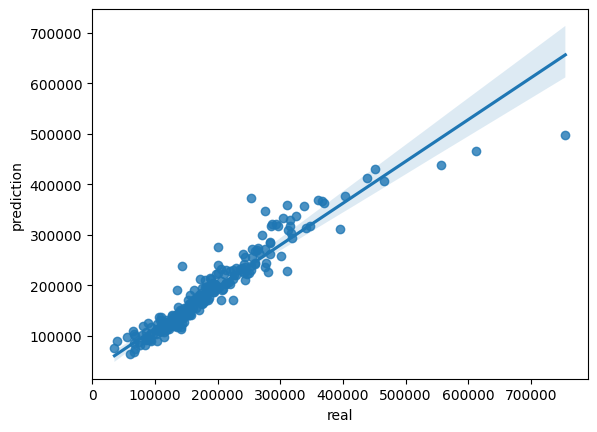

In [14]:
import seaborn as sns

if target_field in data:
    if (model.problem_type == 'regression'):
        sns.regplot(x = data[target_field], y = prediction)
        plt.xlabel("real")
        plt.ylabel("prediction")